In [1]:
#pip install Pyforest 
#code for installing required libraries in environment

In [2]:
#pip install -U klib
import klib #Using Klib fot EDA Purpose

In [3]:
df=pd.read_csv("TRAIN.csv") #importing the data
df_test_final=pd.read_csv("TEST_FINAL.csv") #importing the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
df.head() #Viewing the data

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
df_test_final.head() #Viewing the data

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [6]:
klib.missingval_plot(df) # returns a figure containing information about missing values

No missing values found in the dataset.


In [7]:
klib.missingval_plot(df_test_final) # returns a figure containing information about missing values

No missing values found in the dataset.


In [8]:
df.info() #info before cleaning the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [9]:
df=klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
df_test_final=klib.data_cleaning(df_test_final) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (188340, 10)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 10.22 MB (-71.12%)

Shape of cleaned data: (22265, 8)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 1.02 MB (-75.0%)



In [10]:
df.info() #info after cleaning the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             188340 non-null  string  
 1   store_id       188340 non-null  int16   
 2   store_type     188340 non-null  category
 3   location_type  188340 non-null  category
 4   region_code    188340 non-null  category
 5   date           188340 non-null  category
 6   holiday        188340 non-null  int8    
 7   discount       188340 non-null  category
 8   hash_order     188340 non-null  int16   
 9   sales          188340 non-null  float32 
dtypes: category(5), float32(1), int16(2), int8(1), string(1)
memory usage: 4.2 MB


In [11]:
df.drop('hash_order', axis=1, inplace=True)# dropping unwanted column order

In [12]:
#df=df.set_index('date') # setting date column as index

In [13]:
df['store_type'].describe() #viewing Statistics of categorical data and looking for unique values

count     188340
unique         4
top           S1
freq       88752
Name: store_type, dtype: object

In [14]:
df['location_type'].describe() #viewing Statistics of categorical data and looking for unique values

count     188340
unique         5
top           L1
freq       85140
Name: location_type, dtype: object

In [15]:
df['region_code'].describe() #viewing Statistics of categorical data and looking for unique values

count     188340
unique         4
top           R1
freq       63984
Name: region_code, dtype: object

In [16]:
df['discount'].describe() #viewing Statistics of categorical data and looking for unique values

count     188340
unique         2
top           No
freq      104051
Name: discount, dtype: object

In [17]:
le = LabelEncoder() #applying label encoder 
df['discount'] = le.fit_transform(df.discount) #Applying Label encoding to discount column

le = LabelEncoder() #applying label encoder 
df_test_final['discount'] = le.fit_transform(df_test_final.discount) #Applying Label encoding to discount column

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Splitting Date column
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_test_final['year'] = df_test_final['date'].dt.year
df_test_final['month'] = df_test_final['date'].dt.month
df_test_final['day'] = df_test_final['date'].dt.day

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
df.describe()  #viewing Statistics of numerical data and looking for negative values, outlaiers

,store_id,holiday,discount,sales,year,month,day
count,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,0.447536,42784.382812,2018.292636,5.498062,15.691860
std,105.366308,0.338256,0.497241,18456.414062,0.454974,3.399450,8.783156
min,1.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000
25%,92.000000,0.000000,0.000000,30426.000000,2018.000000,3.000000,8.000000
50%,183.000000,0.000000,0.000000,39678.000000,2018.000000,5.000000,16.000000
75%,274.000000,0.000000,1.000000,51909.000000,2019.000000,8.000000,23.000000
max,365.000000,1.000000,1.000000,247215.000000,2019.000000,12.000000,31.000000


In [20]:
df.corr()

,store_id,holiday,discount,sales,year,month,day
store_id,1.000000e+00,5.380970e-16,-0.000693,0.004377,4.924216e-15,-2.816837e-16,-4.550589e-17
holiday,5.380970e-16,1.000000e+00,0.019545,-0.154779,1.386181e-02,1.370518e-02,1.366827e-02
discount,-6.928774e-04,1.954527e-02,1.000000,0.323906,-3.006382e-02,1.369165e-02,-7.813611e-02
sales,4.376631e-03,-1.547788e-01,0.323906,1.000000,1.828431e-02,-1.809195e-02,-3.896935e-02
year,4.924216e-15,1.386181e-02,-0.030064,0.018284,1.000000e+00,-4.701419e-01,-5.078096e-03
month,-2.816837e-16,1.370518e-02,0.013692,-0.018092,-4.701419e-01,1.000000e+00,1.273428e-02
day,-4.550589e-17,1.366827e-02,-0.078136,-0.038969,-5.078096e-03,1.273428e-02,1.000000e+00


In [21]:
# here store type and st
df.head() #here we see that it is a multi variate time series forecasting problem. 

,id,store_id,store_type,location_type,region_code,date,holiday,discount,sales,year,month,day
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,7011.839844,2018,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,51789.121094,2018,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,36868.199219,2018,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,19715.160156,2018,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,45614.519531,2018,1,1


In [22]:
# here store type and st
df_test_final.head() #here we see that it is a multi variate time series forecasting problem. 

,id,store_id,store_type,location_type,region_code,date,holiday,discount,year,month,day
0,T1188341,171,S4,L2,R3,2019-06-01,0,0,2019,6,1
1,T1188342,172,S1,L1,R1,2019-06-01,0,0,2019,6,1
2,T1188343,173,S4,L2,R1,2019-06-01,0,0,2019,6,1
3,T1188344,174,S1,L1,R4,2019-06-01,0,0,2019,6,1
4,T1188345,170,S1,L1,R2,2019-06-01,0,0,2019,6,1


<AxesSubplot:>

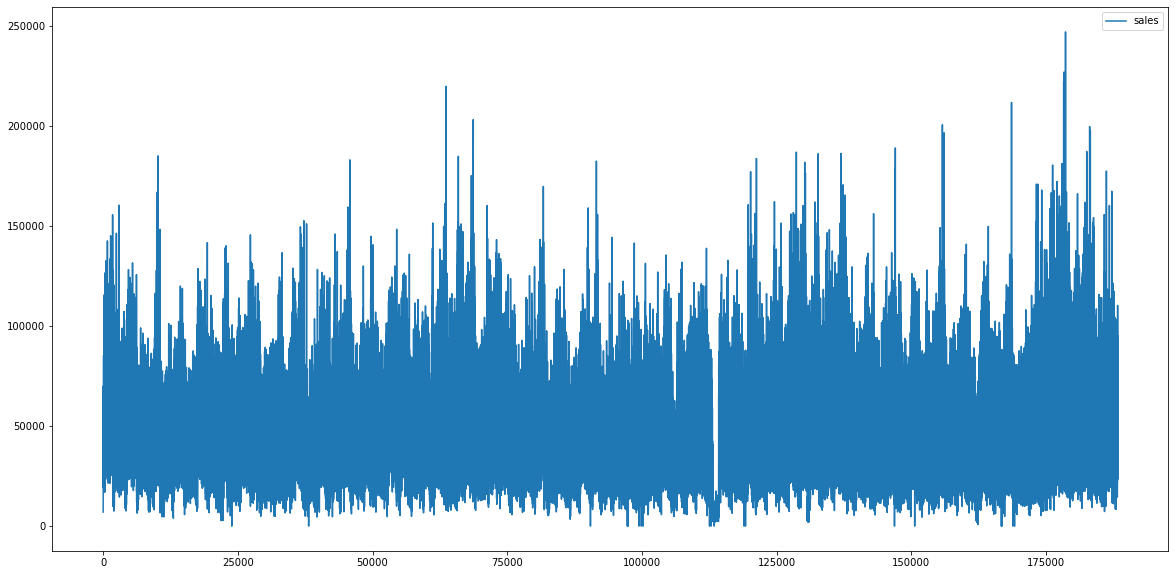

In [23]:
df.plot( y='sales', figsize=(20,10))

In [24]:
#Setting the value for X and Y
x = df[['holiday', 'discount', 'year','month','day','store_type','location_type','region_code']]
y = df['sales']

In [25]:
#Applying One hot Encoding on both Test and train Dataset

df = pd.get_dummies(df,columns=["store_type","location_type","region_code"],drop_first=True)
x = pd.get_dummies(x,columns=["store_type","location_type","region_code"],drop_first=True)
df_test_final = pd.get_dummies(df_test_final,columns=["store_type","location_type","region_code"],drop_first=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df.head()

,id,store_id,date,holiday,discount,sales,year,month,day,store_type_S2,store_type_S3,store_type_S4,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R2,region_code_R3,region_code_R4
0,T1000001,1,2018-01-01,1,1,7011.839844,2018,1,1,0,0,0,0,1,0,0,0,0,0
1,T1000002,253,2018-01-01,1,1,51789.121094,2018,1,1,0,0,1,1,0,0,0,0,0,0
2,T1000003,252,2018-01-01,1,1,36868.199219,2018,1,1,0,1,0,1,0,0,0,0,0,0
3,T1000004,251,2018-01-01,1,1,19715.160156,2018,1,1,1,0,0,0,1,0,0,0,0,0
4,T1000005,250,2018-01-01,1,1,45614.519531,2018,1,1,1,0,0,0,1,0,0,0,0,1


In [27]:
df_test_final.head()

,id,store_id,date,holiday,discount,year,month,day,store_type_S2,store_type_S3,store_type_S4,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R2,region_code_R3,region_code_R4
0,T1188341,171,2019-06-01,0,0,2019,6,1,0,0,1,1,0,0,0,0,1,0
1,T1188342,172,2019-06-01,0,0,2019,6,1,0,0,0,0,0,0,0,0,0,0
2,T1188343,173,2019-06-01,0,0,2019,6,1,0,0,1,1,0,0,0,0,0,0
3,T1188344,174,2019-06-01,0,0,2019,6,1,0,0,0,0,0,0,0,0,0,1
4,T1188345,170,2019-06-01,0,0,2019,6,1,0,0,0,0,0,0,0,1,0,0


In [28]:
x.head()

,holiday,discount,year,month,day,store_type_S2,store_type_S3,store_type_S4,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R2,region_code_R3,region_code_R4
0,1,1,2018,1,1,0,0,0,0,1,0,0,0,0,0
1,1,1,2018,1,1,0,0,1,1,0,0,0,0,0,0
2,1,1,2018,1,1,0,1,0,1,0,0,0,0,0,0
3,1,1,2018,1,1,1,0,0,0,1,0,0,0,0,0
4,1,1,2018,1,1,1,0,0,0,1,0,0,0,0,1


In [29]:
y.head()

0     7011.839844
1    51789.121094
2    36868.199219
3    19715.160156
4    45614.519531
Name: sales, dtype: float32

In [30]:
#create train and test split
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
#using train, test datasets
from sklearn import linear_model as lm
reg = lm.LinearRegression(normalize=True)
reg.fit(x_train, y_train)

# print intercept and coefficients
print(reg.intercept_)
print(reg.coef_)



-2236018.489510738
[ -8846.20469938  12120.95641828   1125.56651253    -43.32613653
    -22.10318208  -4730.85676642   4637.03560761  13573.93270863
  10529.02409169  -4589.13657219  -7649.76362994 -10226.73412214
   -621.62550804   -924.3157413   -1203.58651318]


In [32]:

#predictions  on test dataset
predictions = reg.predict(x_test)
validate = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})


<IPython.core.display.Javascript object>

In [33]:
# Evaluating
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Mean Squared Log Error:', mean_squared_log_error(y_test, predictions)*1000)

<IPython.core.display.Javascript object>

Root Mean Squared Error: 12366.841709239978
Mean Squared Error: 152938773.8613976
Mean Squared Log Error: 111.65883528091167


In [34]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
lm = smf.ols(formula='sales ~ holiday + discount + year + month + day + store_type_S2 + store_type_S3 + store_type_S4 + location_type_L2 + location_type_L3 + location_type_L4 + location_type_L5 + region_code_R2 + region_code_R3 + region_code_R4', data=df).fit()
lm.conf_int()
lm.summary()#viewing the metrics of linear regressions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                 1.535e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:53:11   Log-Likelihood:            -2.0421e+06
No. Observations:              188340   AIC:                         4.084e+06
Df Residuals:                  188324   BIC:                         4.084e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.146e+06   1.44e+05    -14.956      0.000   -2.43e+06   -1.86e+06
holiday          -8798.9699     84.396   -104.258      0.000   -8964.385   -8633.555
discount          1.209e+04     57.590    209.955      0.000     1.2e+04    1.22e+04
year              1081.0937     71.090     15.207      0.000     941.759    1220.428
month              -41.6515      9.512     -4.379      0.000     -60.294     -23.009
day                -23.2821      3.259     -7.145      0.000     -29.669     -16.895
store_type_S2    -4790.7559     99.889    -47.961      0.000   -4986.536   -4594.976
store_type_S3     4651.3219     95.328     48.793      0.000    4464.482    4838.162
store_type_S4     1.355e+04     97.240    139.386      0.000    1.34e+04    1.37e+04
location_type_L2  1.053e+04     85.106    123.760      0.000    1.04e+04    1.07e+04
location_type_L3 -4551.4422     89.644    -50.773      0.000   -4727.142   -4375.743
location_type_L4 -7663.1623    134.383    -57.025      0.000   -7926.550   -7399.774
location_type_L5 -1.017e+04    136.091    -74.732      0.000   -1.04e+04   -9903.610
region_code_R2    -627.3984     77.025     -8.145      0.000    -778.367    -476.430
region_code_R3    -903.3814     81.286    -11.114      0.000   -1062.700    -744.062
region_code_R4   -1139.6153     98.578    -11.561      0.000   -1332.826    -946.405
==============================================================================
Omnibus:                    58925.195   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           443145.665
Skew:                           1.304   Prob(JB):                         0.00
Kurtosis:                      10.048   Cond. No.                     1.02e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
predictions = reg.predict(x_test) #predicting on the test dataset

In [36]:
df.head()

,id,store_id,date,holiday,discount,sales,year,month,day,store_type_S2,store_type_S3,store_type_S4,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R2,region_code_R3,region_code_R4
0,T1000001,1,2018-01-01,1,1,7011.839844,2018,1,1,0,0,0,0,1,0,0,0,0,0
1,T1000002,253,2018-01-01,1,1,51789.121094,2018,1,1,0,0,1,1,0,0,0,0,0,0
2,T1000003,252,2018-01-01,1,1,36868.199219,2018,1,1,0,1,0,1,0,0,0,0,0,0
3,T1000004,251,2018-01-01,1,1,19715.160156,2018,1,1,1,0,0,0,1,0,0,0,0,0
4,T1000005,250,2018-01-01,1,1,45614.519531,2018,1,1,1,0,0,0,1,0,0,0,0,1


In [37]:
#Training on the whole model
reg.fit(x, y)

LinearRegression(normalize=True)

In [38]:
df_id=df_test_final['id'] #copping Id on the final Dataset
df_test_final=df_test_final.drop(['store_id','date','id'], axis=1) #Dropping the columns

In [39]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   holiday           22265 non-null  int8 
 1   discount          22265 non-null  int32
 2   year              22265 non-null  int64
 3   month             22265 non-null  int64
 4   day               22265 non-null  int64
 5   store_type_S2     22265 non-null  uint8
 6   store_type_S3     22265 non-null  uint8
 7   store_type_S4     22265 non-null  uint8
 8   location_type_L2  22265 non-null  uint8
 9   location_type_L3  22265 non-null  uint8
 10  location_type_L4  22265 non-null  uint8
 11  location_type_L5  22265 non-null  uint8
 12  region_code_R2    22265 non-null  uint8
 13  region_code_R3    22265 non-null  uint8
 14  region_code_R4    22265 non-null  uint8
dtypes: int32(1), int64(3), int8(1), uint8(10)
memory usage: 848.1 KB


In [40]:
predictions = reg.predict(df_test_final) #Applying the predictions on the unknown dataset

In [41]:
predictions = pd.DataFrame(predictions)#converting into dataframe

predicted_sales= pd.concat([df_id, predictions],axis=1) #combining two datasets

predicted_sales.columns = ['ID', 'Sales'] #renaming Columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
predicted_sales.describe() #checking The predictions

,Sales
count,22265.000000
mean,44120.056298
std,13379.237896
min,11179.123045
25%,34779.632695
50%,42874.763642
75%,52049.332883
max,72368.094334


In [43]:
y.describe()

count    188340.000000
mean      42784.382812
std       18456.414062
min           0.000000
25%       30426.000000
50%       39678.000000
75%       51909.000000
max      247215.000000
Name: sales, dtype: float64

In [45]:
predicted_sales.to_csv('Leanear_Regression_Sales_prediction.csv',index=False) #getting Output